## Green Trips

In [17]:
import pandas as pd
import numpy as np

In [18]:
green = pd.read_csv('green_trips.csv.gz')
geography = pd.read_csv("geographic.csv")

In [19]:
green.head()

,pickup_datetime,dropoff_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,trip_distance,total_amount
0,2015-02-01 01:26:45,2015-02-01 01:49:58,-73.953545,40.811172,-73.984764,40.728386,1,8.11,27.8
1,2015-01-02 20:06:28,2015-01-02 20:14:04,-73.946709,40.714321,-73.961571,40.711475,1,1.29,9.8
2,2014-09-27 17:55:38,2014-09-27 18:19:56,-73.957626,40.718094,-73.947304,40.777813,5,6.12,26.3
3,2014-04-27 02:27:04,2014-04-27 02:39:02,-73.949501,40.713997,-73.987785,40.718582,2,3.68,17.3
4,2014-05-26 18:32:19,2014-05-26 18:44:13,-73.944092,40.672195,-73.977325,40.664013,1,2.40,11.5


In [48]:
green.shape

(3589048, 9)

In [20]:
geography.head()

,BK88,QN52,QN48,QN51,QN27,BX35,BX98,QN07,MN06,QN02,...,MN25,MN24,MN23,MN13,MN15,MN32,MN33,MN99,QN18,QN29
0,-73.976051,-73.794934,-73.775740,-73.803792,-73.861099,-73.896967,-73.872873,-73.757258,-73.946080,-73.760316,...,-74.000784,-73.992605,-73.989904,-74.001535,-73.993833,-73.938048,-73.935054,-74.010930,-73.858726,-73.867911
1,40.631284,40.757806,40.743334,40.775618,40.763673,40.834350,40.785983,40.718147,40.821271,40.675118,...,40.694295,40.724145,40.734443,40.762653,40.772940,40.780838,40.791695,40.684500,40.735717,40.744942
2,-73.977167,-73.794749,-73.775799,-73.800991,-73.859931,-73.896787,-73.872886,-73.755890,-73.946404,-73.758806,...,-74.000960,-73.992634,-73.989870,-74.001339,-73.993789,-73.937903,-73.935108,-74.011934,-73.858672,-73.867877
3,40.630755,40.755636,40.743326,40.775397,40.762209,40.834133,40.785971,40.716307,40.820580,40.673014,...,40.694077,40.724065,40.733535,40.762217,40.772912,40.780758,40.791658,40.683896,40.735627,40.744824
4,-73.977000,-73.794579,-73.778060,-73.798653,-73.859668,-73.896303,-73.872983,-73.754702,-73.946720,-73.758598,...,-74.003015,-73.993093,-73.990028,-74.001279,-73.993727,-73.937796,-73.935173,-74.012177,-73.858585,-73.867852


In [21]:
# Revisar si existen valores nulos (NaNs)
# green.isnull().sum()

El siguiente procedimiento convierte el formato leído a un formato similar al .wkt que lee la librería de gráficos `geopandas`.

In [22]:
geodf_raw = geography.transpose()

In [23]:
ntas_names = list(geodf_raw.index)
polygons = []
for i in range(len(geodf_raw)):
    string = 'POLYGON (('
    coord = ''
    for j in geodf_raw.columns:
        if (not pd.isna(geodf_raw.iloc[i,j])): 
            if j % 2 == 0:
                coord = str(geodf_raw.iloc[i,j])
            elif j % 2 == 1:
                coord = coord + ' ' + str(geodf_raw.iloc[i,j]) + ','
                string = string + coord
    string = string + str(geodf_raw.iloc[i,0]) + ' ' + str(geodf_raw.iloc[i,1]) + '))'
    polygons.append(string)
    
ntas_df = pd.DataFrame( {'name':ntas_names, 'geometry':polygons} )
ntas_df.head()

,name,geometry
0,BK88,"POLYGON ((-73.9760507905698 40.6312841471042,-..."
1,QN52,"POLYGON ((-73.7949338459459 40.7578063026709,-..."
2,QN48,POLYGON ((-73.7757397458527 40.743333917592295...
3,QN51,"POLYGON ((-73.8037916164017 40.7756183875692,-..."
4,QN27,"POLYGON ((-73.8610986485262 40.7636727485249,-..."


In [ ]:
#ntas_df.to_csv(index=False)


In [24]:
import geopandas
from shapely import wkt

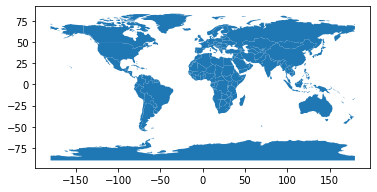

In [25]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.plot();

In [26]:
ntas_df['geometry'] = ntas_df['geometry'].apply(wkt.loads)

In [27]:
gdf = geopandas.GeoDataFrame(ntas_df, geometry='geometry')
print(gdf.head())

   name                                           geometry
0  BK88  POLYGON ((-73.9760507905698 40.6312841471042, ...
1  QN52  POLYGON ((-73.79493384594591 40.7578063026709,...
2  QN48  POLYGON ((-73.7757397458527 40.7433339175923, ...
3  QN51  POLYGON ((-73.8037916164017 40.7756183875692, ...
4  QN27  POLYGON ((-73.86109864852619 40.7636727485249,...


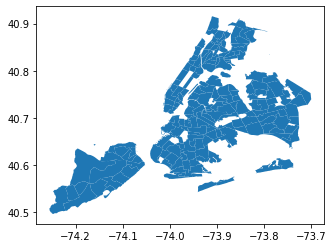

In [28]:
gdf.plot();

### Convirtiendo puntos en NTAs

In [30]:
from shapely.geometry import Point, Polygon

In [35]:
green2 = green

In [39]:
point_list = []
for i in list(zip(list(green2['pickup_latitude']),list(green2['pickup_longitude']))):
    point_list.append(Point(i[1],i[0]))
point_list_df = pd.DataFrame(columns = ['geometry'], data = point_list)
# point_list_df['geometry'] = point_list_df['geometry'].apply(wkt.loads)

# point_list_df

In [40]:
point_list_df.head()f

,geometry
0,POINT (-73.9535446167 40.8111724854)
1,POINT (-73.9467086792 40.7143211365)
2,POINT (-73.9576263428 40.7180938721)
3,POINT (-73.9495010376 40.7139968872)
4,POINT (-73.9440917969 40.6721954346)


In [41]:
points_gdf = geopandas.GeoDataFrame(point_list_df, geometry='geometry')
print(points_gdf.head())

                               geometry
0  POINT (-73.9535446167 40.8111724854)
1  POINT (-73.9467086792 40.7143211365)
2  POINT (-73.9576263428 40.7180938721)
3  POINT (-73.9495010376 40.7139968872)
4  POINT (-73.9440917969 40.6721954346)


In [63]:
points = points_gdf
polys = gdf
pointInPoly = geopandas.sjoin(points, polys, op='within')

In [88]:
pointInPoly.tail()

,geometry,index_right,name
3408732,POINT (-73.98179626460001 40.7311439514),90,MN50
2650734,POINT (-74.2121810913 40.552646637),181,SI32
2748946,POINT (-74.15228271479999 40.550163269),163,SI54
3239409,POINT (-74.15822601319999 40.5381355286),163,SI54
3158235,POINT (-74.17520141600001 40.5513572693),162,SI01


In [65]:
pointInPoly.shape

(3491499, 3)

In [66]:
datos_faltantes = 3589048 - 3491499
datos_faltantes

97549

In [82]:
df_count_group_by_NTA = pointInPoly.groupby(pointInPoly['name']).size()

In [85]:
df_count_group_by_NTA.sort_values(ascending=[False])

name
BK73    262645
QN70    173194
MN34    171974
BK38    171813
MN11    171143
MN33    153241
MN09    150311
QN29    136821
BK37    123653
MN03    121056
QN31    104544
QN28    103388
MN36     85985
BK68     85288
QN17     77793
BK76     75802
QN63     68202
BK09     65481
BK33     64519
BK69     62572
QN72     60334
MN04     58020
BK61     55072
BK75     50046
BK90     43268
QN22     37285
QN61     35180
MN35     32854
BX63     32313
MN06     31739
         ...  
QN66        61
QN45        51
SI37        50
MN24        46
MN13        40
MN19        38
MN27        31
SI24        30
MN23        30
MN22        30
SI07        29
MN15        29
MN14        27
SI05        22
SI14        21
MN20        16
SI45        12
BK99        12
SI08        12
SI35        11
MN21        10
SI36        10
QN10         6
QN99         6
MN50         6
SI48         3
SI11         3
SI54         2
SI01         1
SI32         1
Length: 178, dtype: int64